#Download And Connect The Enron Data 

In [11]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-27 20:29:53--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-27 20:29:54--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  81.9MB/s    in 13s     

2023-05-27 20:30:08 (60.

In [12]:
import sqlite3
#SQLite3 is imported to view and manipulate the dataset

In [13]:
#Conn is used to create a connction between the code and sqlite for data maipulation 
conn = sqlite3.connect('enron.db')
cur = conn.cursor()

#The Tables 

In [14]:
#employee list table 
sql = """
CREATE TABLE IF NOT EXISTS employeelist(
   userid INT PRIMARY KEY,
   firstname TEXT,
   lastname TEXT,
   email_id REAL,
   email2 REAL, 
   email3 REAL,
   email4 REAL, 
   folder TEXT,
   status TEXT);
"""

#Execute query and commit transaction 
cur.execute(sql)
conn.commit()


In [15]:
#create message table 
sql = """
CREATE TABLE IF NOT EXISTS message(
   mid INT PRIMARY KEY,
   sender TEXT,
   date REAL,
   message_id TEXT,
   subject TEXT,
   body TEXT,
   folder TEXT);

"""

#execute query and commit transaction 
cur.execute(sql)
conn.commit()

In [16]:
#create the recepient info table 
sql = """
CREATE TABLE IF NOT EXISTS recipientInfo(
   rid TEXT PRIMARY KEY,
   mid TEXT,
   rtype REAL,
   rvalue TEXT);

"""

#execute query and commit transaction 
cur.execute(sql)
conn.commit()

In [17]:
#create the Reference Info Table 
sql = """
CREATE TABLE IF NOT EXISTS referenceInfo(
   rfid TEXT PRIMARY KEY,
   mid TEXT,
   reference REAL);

"""

#execute query and commit transaction 
cur.execute(sql)
conn.commit()

#Emails Sent By Each Employee

In [18]:

sql= '''
SELECT sender, count(mid) AS message_count
   FROM message
   GROUP BY sender
   ORDER BY message_count;

'''   
#execute the sql query
rows = cur.execute(sql) 
for row in rows :
  print(row)


Streaming output truncated to the last 5000 lines.
('dtran@energy.state.ca.us', 4)
('ectlon-ln1@enron.com', 4)
('ed.agner@enron.com', 4)
('ed.quinn@enron.com', 4)
('edgonzales@ev1.net', 4)
('editor@theb2bvoice.com', 4)
('editorial@mail.realtimetraders.com', 4)
('edmundg@manfinancial.com', 4)
('edward.terry@enron.com', 4)
('eharris@insightpartners.com', 4)
('eigcirculation@networkats.com', 4)
('eileen@pira.com', 4)
('eismail@energyinfosource.com', 4)
('ekao@uh.edu', 4)
('elaine.overturf@enron.com', 4)
('elizabeth.guffy@bakerbotts.com', 4)
('elizabeth.moore@enron.com', 4)
('ellis@haas.berkeley.edu', 4)
('elyse.kalmans@enron.com', 4)
('email@email.themoment.com', 4)
('email@martindale.com', 4)
('emca@yahoogroups.com', 4)
('emilio.vicens@enron.com', 4)
('employee.services@enron.com', 4)
('emy.geraldo@enron.com', 4)
('enronmediacuttings@enron.com', 4)
('eoria@nebar.com', 4)
('eric.ledain@enron.com', 4)
('eric.mcmurry@elpaso.com', 4)
('eric.shaw@enron.com', 4)
('erica.fields@enron.com', 4)
(

In [19]:
import pandas as pd 

sql = '''
SELECT sender, count(mid) AS message_count, 
   FROM message
   GROUP BY sender
   ORDER BY message_count;

'''   
#load the data onto a dataframe
messages_df = pd.read_sql_query(sql,conn) 
messages_df
 


DatabaseError: ignored

In [20]:
#extract the number of the users with the most emails 
message_top_emailers= messages_df.tail(10)
print(message_top_emailers)
 

NameError: ignored

In [21]:

import matplotlib.pyplot as plt
message_top_emailers.plot()


NameError: ignored

In [25]:
import matplotlib.pyplot as plt
message_top_emailers.plot.bar(title='Top Ten Emailers ', figsize= (12,8))
plt.xlabel('sender')
plt.ylabel('message_count')
plt.show()

NameError: ignored

#Messages sent per day 

In [23]:
sql = '''
SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message 
   GROUP BY date_sent
   ORDER BY date_sent;
'''

#execute the sql query
rows = cur.execute(sql) 
for row in rows :
  print(row)

('0001-05-30', 2)
('0001-06-18', 1)
('0001-07-24', 1)
('0001-08-01', 1)
('0001-08-06', 1)
('0001-08-13', 1)
('0001-08-21', 1)
('0001-08-22', 1)
('0001-08-26', 1)
('0001-08-27', 1)
('0001-08-28', 4)
('0001-08-30', 1)
('0001-09-03', 1)
('0001-09-05', 2)
('0001-09-13', 1)
('0001-09-17', 1)
('0001-09-19', 1)
('0001-09-20', 1)
('0001-09-21', 1)
('0001-09-26', 1)
('0001-10-04', 1)
('0001-10-05', 1)
('0001-10-08', 1)
('0001-10-12', 1)
('0001-10-15', 3)
('0001-10-16', 3)
('0001-10-17', 4)
('0001-10-18', 8)
('0001-10-19', 1)
('0001-10-21', 1)
('0001-10-22', 6)
('0001-10-24', 1)
('0001-10-25', 4)
('0001-10-26', 8)
('0001-10-29', 18)
('0001-10-30', 1)
('0001-11-02', 1)
('0001-11-08', 1)
('0001-11-14', 1)
('0001-11-15', 1)
('0001-11-19', 10)
('0001-11-20', 3)
('0001-11-21', 7)
('0001-11-22', 3)
('0001-11-23', 1)
('0001-11-25', 1)
('0001-11-26', 9)
('0001-11-27', 15)
('0001-11-28', 2)
('0001-11-29', 2)
('0001-11-30', 1)
('0001-12-03', 3)
('0001-12-04', 2)
('0001-12-06', 2)
('0001-12-07', 1)
('0001-

In [24]:
import pandas as pd 

sql = '''
SELECT date(date) AS date_sent, count(mid) AS message_count
   FROM message 
   GROUP BY date_sent
   ORDER BY date_sent;

'''   
#load the data onto a dataframe
messages_df = pd.read_sql_query(sql,conn) 
messages_df

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


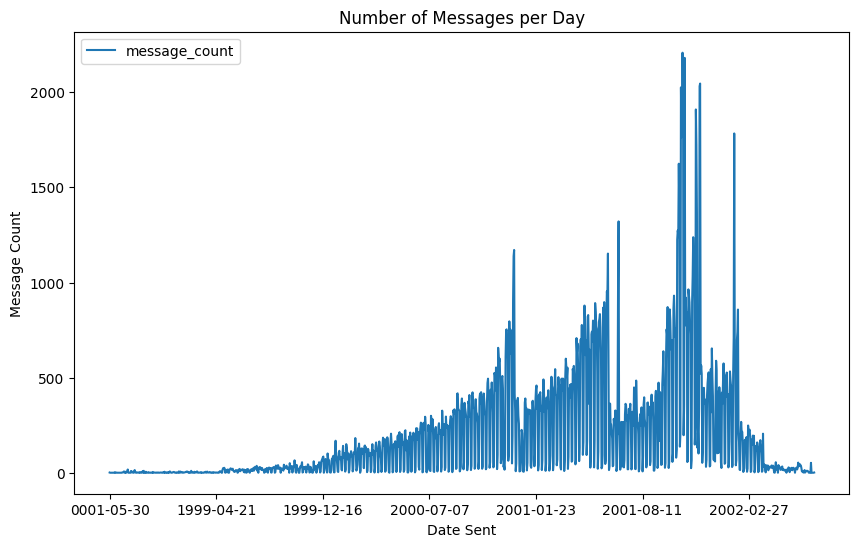

In [26]:
import matplotlib.pyplot as plt
messages_df.plot(title='Number of Messages per Day', x = 'date_sent', y = 'message_count', figsize= (10,6))
plt.ylabel('Message Count')
plt.xlabel('Date Sent')
plt.show()

#Busiest Time Period Code

##Create The Dataframe For Each Year 

In [27]:
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '0001-05-30' AND '0002-03-12'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
first_timeperiod = pd.read_sql_query(sql,conn) 
first_timeperiod

,date_sent,message_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
97,0002-02-28,2
98,0002-03-01,1
99,0002-03-05,1
100,0002-03-07,3


<Axes: >

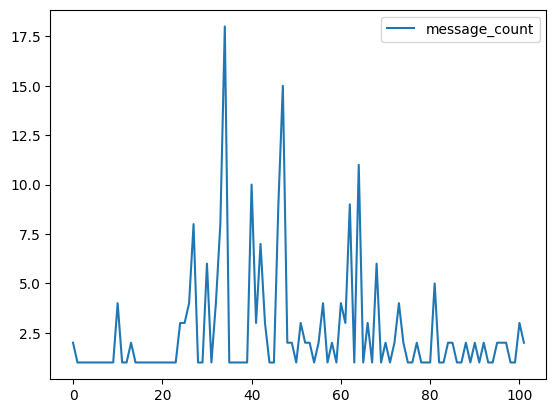

In [28]:
#create a plot for each year and extract the busiest time frame 
import matplotlib.pyplot as plt
first_timeperiod.plot()

In [29]:
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '1979-12-31' AND '1999-12-31'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
second_timeperiod = pd.read_sql_query(sql,conn) 
second_timeperiod

,date_sent,message_count
0,1979-12-31,6
1,1997-01-01,1
2,1998-01-04,1
3,1998-01-05,1
4,1998-10-30,3
...,...,...
305,1999-12-24,2
306,1999-12-27,102
307,1999-12-28,76
308,1999-12-29,64


<Axes: >

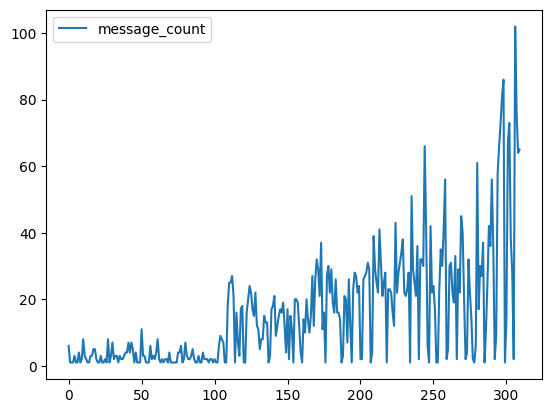

In [30]:
import matplotlib.pyplot as plt
second_timeperiod.plot()

In [31]:
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '2000-01-01' AND '2000-12-31'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
third_timeperiod = pd.read_sql_query(sql,conn) 
third_timeperiod

,date_sent,message_count
0,2000-01-01,2
1,2000-01-02,2
2,2000-01-03,15
3,2000-01-04,74
4,2000-01-05,72
...,...,...
358,2000-12-26,77
359,2000-12-27,226
360,2000-12-28,209
361,2000-12-29,119


<Axes: >

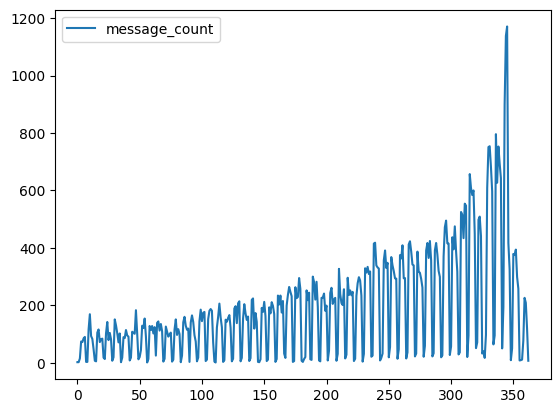

In [32]:
import matplotlib.pyplot as plt
third_timeperiod.plot()

In [33]:
import pandas as pd

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '2001-01-01' AND '2001-12-31'
 GROUP BY date_sent
 ORDER BY date_sent

 '''
#load the data onto a dataframe
fourth_timeperiod = pd.read_sql_query(sql,conn) 
fourth_timeperiod

,date_sent,message_count
0,2001-01-01,46
1,2001-01-02,369
2,2001-01-03,391
3,2001-01-04,341
4,2001-01-05,340
...,...,...
359,2001-12-26,407
360,2001-12-27,589
361,2001-12-28,539
362,2001-12-29,103


<Axes: >

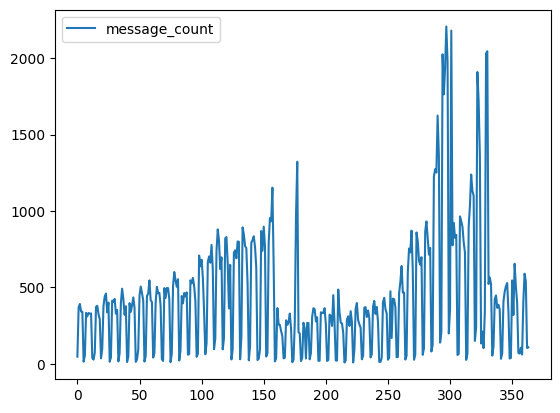

In [34]:
import matplotlib.pyplot as plt
fourth_timeperiod.plot()

In [35]:
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '2002-01-01' AND '2044-01-04'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
fifth_timeperiod = pd.read_sql_query(sql,conn) 
fifth_timeperiod

,date_sent,message_count
0,2002-01-01,106
1,2002-01-02,450
2,2002-01-03,375
3,2002-01-04,371
4,2002-01-05,55
...,...,...
174,2007-02-11,1
175,2020-12-24,1
176,2020-12-29,1
177,2043-12-28,1


<Axes: >

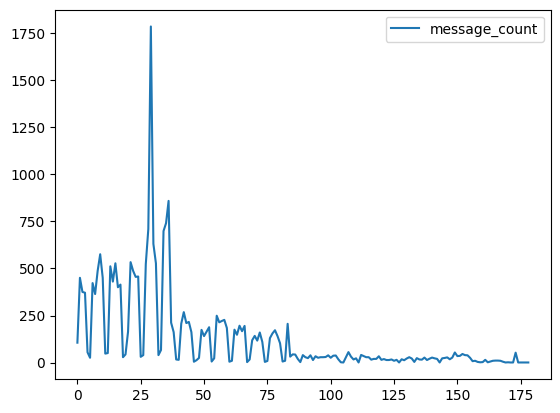

In [36]:
import matplotlib.pyplot as plt
fifth_timeperiod.plot()

##Extract Data For The Busiest Quarter 

In [37]:
import pandas as pd

sql= '''
SELECT date(date) AS date_sent, mid AS message_count
  FROM message
 WHERE message_count > 100
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
message_timeperiod = pd.read_sql_query(sql,conn) 
message_timeperiod

,date_sent,message_count
0,0001-05-30,398326
1,0001-06-18,268592
2,0001-07-24,268758
3,0001-08-01,198172
4,0001-08-06,366803
...,...,...
1318,2020-12-24,87609
1319,2020-12-29,87570
1320,2043-12-28,252557
1321,2044-01-02,252559


<Axes: >

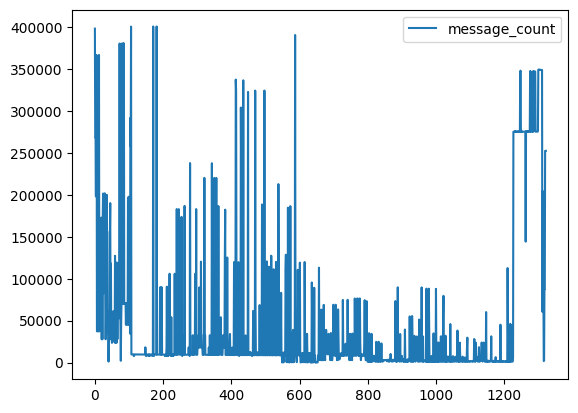

In [39]:
import matplotlib as plt 
message_timeperiod.plot()

In [40]:
#create the first busy time period 
import pandas as pd 

sql= '''
SELECT date(date) AS date_sent, count(mid) AS message_count
  FROM message
 WHERE date BETWEEN '2001-09-04' AND '2001-11-24'
 GROUP BY date_sent
 ORDER BY date_sent;

 '''
#load the data onto a dataframe
first_quarter = pd.read_sql_query(sql,conn) 
first_quarter

,date_sent,message_count
0,2001-09-04,403
1,2001-09-05,431
2,2001-09-06,357
3,2001-09-07,330
4,2001-09-08,26
...,...,...
76,2001-11-19,1909
77,2001-11-20,1723
78,2001-11-21,1365
79,2001-11-22,132


In [41]:
def messages(df):
    return df['date_sent'].value_counts().sort_index()

messages_per_day =    



SyntaxError: ignored

In [42]:
import matplotlib.pyplot as plt
messages_df.plot()


axes.set_xlabel('Number of Messages ')
<matplotlib.text.Text object at 0x05EAF810>

>>> axes.set_ylabel('Date')
<matplotlib.text.Text object at 0x05EDD730>

>>> axes.set_title('Number of Messages Sent Per Day ')
<matplotlib.text.Text object at 0x05EFA6F0>

SyntaxError: ignored